## Cats predictions only

In [1]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
import pandas as pd 
import numpy as np 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from IPython.display import display
from matplotlib.pyplot import figure, show
from numpy import arange, sin, pi
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.svm import SVC

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#load csv file into data frame
animal_df = pd.read_csv('train.csv')
animal_df.shape

(26729, 10)

In [3]:
#drop animalID
animal_df.drop(['AnimalID', 'OutcomeType'], axis=1, inplace=True)
animal_df.shape

(26729, 8)

In [4]:
#keep only data for cats
animal_df = animal_df[~animal_df['AnimalType'].isin(['Dog'])]
animal_df.shape

(11134, 8)

In [5]:
# Giving numerical values to our label
def categorical_to_numeric(x):
    if x == 'Suffering':
        return 0
    elif x == 'Foster':
        return 1
    elif x == 'Partner':
        return 2
    elif x == 'Offsite':
        return 3
    elif x == 'SCRP':
        return 4
    elif x == 'Aggressive':
        return 5
    elif x == 'Rabies Risk':
        return 6
    elif x == 'Medical':
        return 7
    elif x == 'In Kennel':
        return 8
    elif x == 'In Foster':
        return 9
    elif x == 'Behavior':
        return 10
    
    
animal_df['OutcomeSubtype'] = animal_df['OutcomeSubtype'].apply(categorical_to_numeric).astype(np.float32)
animal_df.head()

,Name,DateTime,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
1,Emily,2013-10-13 12:44:00,0.0,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
3,NaN,2014-07-11 19:09:00,2.0,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
6,Jimmy,2015-03-28 13:11:00,2.0,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,NaN,2015-04-30 17:02:00,2.0,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
10,NaN,2013-12-05 15:50:00,4.0,Cat,Unknown,2 years,Domestic Shorthair Mix,Black


In [6]:
#Convert date time to single columns for year, month, day
datetime = pd.to_datetime(animal_df['DateTime']).dt
animal_df['Year'] = datetime.year
animal_df['Month'] = datetime.month
animal_df['Day'] = datetime.day
animal_df.drop(['DateTime', 'AnimalType'], axis=1, inplace=True)
animal_df.head()

,Name,OutcomeSubtype,SexuponOutcome,AgeuponOutcome,Breed,Color,Year,Month,Day
1,Emily,0.0,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,2013,10,13
3,NaN,2.0,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,2014,7,11
6,Jimmy,2.0,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby,2015,3,28
7,NaN,2.0,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby,2015,4,30
10,NaN,4.0,Unknown,2 years,Domestic Shorthair Mix,Black,2013,12,5


In [7]:
# fill in the NaN with 0s
animal_df['Name'] = animal_df['Name'].fillna(0)

# change names to numeric values
for names in animal_df['Name']:
    if isinstance(names, str) and not 0:
        animal_df['Name'].replace(names, '1', inplace=True)
animal_df['Name'] = animal_df['Name'].astype(int)
animal_df.dropna(inplace= True)
animal_df.head()

,Name,OutcomeSubtype,SexuponOutcome,AgeuponOutcome,Breed,Color,Year,Month,Day
1,1,0.0,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,2013,10,13
3,0,2.0,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,2014,7,11
6,1,2.0,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby,2015,3,28
7,0,2.0,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby,2015,4,30
10,0,4.0,Unknown,2 years,Domestic Shorthair Mix,Black,2013,12,5


In [8]:
#Convert age to weeks
def change_year_month_to_weeks(x):
    count, parse_age = x.split(" ")
    if parse_age == 'month':
        return int(4)
    elif parse_age == 'months':
        return 4 * int(count)
    elif parse_age == 'year':
        return int(52)
    elif parse_age == 'years':
        return 52 * int(count)
    elif parse_age == 'week':
        return int(count)
    elif parse_age == 'weeks':
        return int(count)
    
animal_df['AgeuponOutcome'] = animal_df['AgeuponOutcome'].apply(change_year_month_to_weeks).astype(np.float32)

animal_df.head()

,Name,OutcomeSubtype,SexuponOutcome,AgeuponOutcome,Breed,Color,Year,Month,Day
1,1,0.0,Spayed Female,52.0,Domestic Shorthair Mix,Cream Tabby,2013,10,13
3,0,2.0,Intact Male,3.0,Domestic Shorthair Mix,Blue Cream,2014,7,11
6,1,2.0,Intact Male,3.0,Domestic Shorthair Mix,Blue Tabby,2015,3,28
7,0,2.0,Unknown,3.0,Domestic Shorthair Mix,Brown Tabby,2015,4,30
10,0,4.0,Unknown,104.0,Domestic Shorthair Mix,Black,2013,12,5


In [9]:
#ONE HOT ENCODE categorical data
to_convert = ['SexuponOutcome', 'Breed', 'Color']

for col in to_convert:
    dummies = pd.get_dummies(animal_df[col])
    animal_df[dummies.columns] = dummies
    
animal_df.shape

(7484, 188)

In [10]:
animal_df.dropna(inplace = True)

#show any null values left
print(animal_df.isnull().sum())

Name                              0
OutcomeSubtype                    0
SexuponOutcome                    0
AgeuponOutcome                    0
Breed                             0
Color                             0
Year                              0
Month                             0
Day                               0
Intact Female                     0
Intact Male                       0
Neutered Male                     0
Spayed Female                     0
Unknown                           0
American Shorthair Mix            0
Angora Mix                        0
Balinese Mix                      0
Bengal Mix                        0
Bombay Mix                        0
British Shorthair Mix             0
Cymric Mix                        0
Devon Rex                         0
Domestic Longhair                 0
Domestic Longhair Mix             0
Domestic Longhair/Persian         0
Domestic Longhair/Rex             0
Domestic Longhair/Russian Blue    0
Domestic Medium Hair        

In [12]:
#get the label to predict on
y = animal_df['OutcomeSubtype']

y.shape

(7168,)

In [14]:
# Dropping Non-numerical columns and our label column:
animal_df.drop(['SexuponOutcome','OutcomeSubtype','Breed','Color'], axis=1, inplace=True)

X = animal_df

X.head()

,Name,AgeuponOutcome,Year,Month,Day,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown,...,White/Brown Tabby,White/Calico,White/Chocolate Point,White/Cream,White/Cream Tabby,White/Gray,White/Lynx Point,White/Orange,White/Orange Tabby,White/White
1,1,52.0,2013,10,13,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3.0,2014,7,11,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,3.0,2015,3,28,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,3.0,2015,4,30,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10,0,104.0,2013,12,5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Splitting the dataset into testing and training:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

print("X_Train size: " + str(X_train.shape))
print("y_train size: " + str(y_train.shape))
print("X_Test size: " + str(X_test.shape))
print("y_test size: " + str(y_test.shape))

X_Train size: (5734, 184)
y_train size: (5734,)
X_Test size: (1434, 184)
y_test size: (1434,)


In [16]:
#Instantiated Random Forest Classifier
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)
# Training on the training set:
my_RandomForest.fit(X_train, y_train)
# Testing on the testing set:
y_predict_rf = my_RandomForest.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_predict_rf)

print("Random Forest accuracy: " + str(rf_accuracy))

Random Forest accuracy: 0.7510460251046025


In [17]:
# Dont display Numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

# Numpy perdictions:

get_prob = my_RandomForest.predict_proba(X_test)
print("Perdictions from Random Forest: ")
print(y_predict_rf)

print("As a percent probablity: ")
display(y_predict_rf[0:5])

logloss_score = metrics.log_loss(y_test, get_prob)

# print("Y_test: " + str(y_test.shape))

# print("Y_predict: " + str(y_predict_rf.shape))

print("Log Loss score: " + str(logloss_score))

Perdictions from Random Forest: 
[4. 2. 4. ... 3. 0. 2.]
As a percent probablity: 


array([4., 2., 4., 2., 2.], dtype=float32)

ValueError: y_true and y_pred contain different number of classes 9, 10. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [0. 1. 2. 3. 4. 6. 7. 8. 9.]

Text(0.5,1,'log(x)')

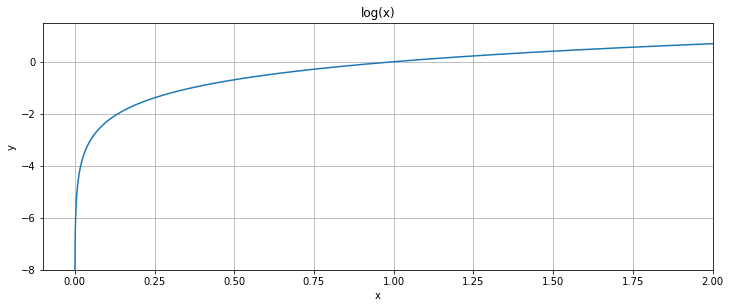

In [18]:
t = arange(1e-5, 5.0, 0.00001)

graph = figure(1, figsize=(12,10))

axis = graph.add_subplot(211)

axis.plot(t, np.log(t))

axis.grid(True)

axis.set_ylim(-8,1.5)
axis.set_xlim(-0.1,2)
axis.set_xlabel('x')
axis.set_ylabel('y')
axis.set_title('log(x)')

In [19]:
# Testing out KNN Classifier on Dog Data up 10 neighbors:
for i in range(1, 11):
    knn_animal = KNeighborsClassifier(n_neighbors = i)
    knn_animal.fit(X_train, y_train)
    y_predict_knn = knn_animal.predict(X_test)

    knn_accuracy = accuracy_score(y_test, y_predict_knn)

    print("KNN Accuracy for  " + str(i) + " neighbors " + str(knn_accuracy))

KNN Accuracy for  1 neighbors 0.6596931659693166
KNN Accuracy for  2 neighbors 0.6234309623430963
KNN Accuracy for  3 neighbors 0.6541143654114365
KNN Accuracy for  4 neighbors 0.6562064156206415
KNN Accuracy for  5 neighbors 0.6659693165969317
KNN Accuracy for  6 neighbors 0.6582984658298466
KNN Accuracy for  7 neighbors 0.6527196652719666
KNN Accuracy for  8 neighbors 0.6506276150627615
KNN Accuracy for  9 neighbors 0.6603905160390516
KNN Accuracy for  10 neighbors 0.6499302649930265


In [20]:
decision_tree_animal = DecisionTreeClassifier()
decision_tree_animal.fit(X_train, y_train)
y_predict_decision_tree = decision_tree_animal.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_predict_decision_tree)

print("Decision Tree Accuracy: " + str(dt_accuracy))

Decision Tree Accuracy: 0.694560669456067


In [21]:
my_AdaBoost = AdaBoostClassifier(n_estimators = 19,random_state=2)
my_AdaBoost.fit(X_train, y_train)
y_predict_ada = my_AdaBoost.predict(X_test)
score_ada = accuracy_score(y_test, y_predict_ada)

# calculating the final accuracy of AdaBoost Classifier
print("AdaBoost Classifier Accuracy: " + str(score_ada))

AdaBoost Classifier Accuracy: 0.7092050209205021


In [22]:
my_ANN = MLPClassifier(hidden_layer_sizes=(100,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.002)

# Training on Training set
my_ANN.fit(X_train, y_train)

# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test)
#print(y_predict_ann)
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
score_ann = accuracy_score(y_test, y_predict_ann)

print("ANN Accuracy: " + str(score_ann))

ANN Accuracy: 0.7552301255230126


In [23]:
# Instantiating Non_Linear SVM
my_nonLinear_SVM = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1, probability=True)

my_nonLinear_SVM.fit (X_train, y_train)

# Testing on the testing set:
y_predict_nlsvm = my_nonLinear_SVM.predict(X_test)

# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
score_nlsvm = accuracy_score(y_test, y_predict_nlsvm)

print("Accuracy of Non-Linear SVM: " + str(score_nlsvm))

Accuracy of Non-Linear SVM: 0.6324965132496513


# Using PCA on Cat Data:

In [24]:
# Setting up PCA on data after OneHotEncoding:
n = 50

my_pca = PCA(n_components = n)

X_PCA = my_pca.fit_transform(X)

#Stored my result from PCA into a new DataFrame
X_2 = pd.DataFrame(X_PCA)

X_2.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-13.673126,-2.862924,-2.891927,1.057730,-0.897734,-0.056986,-0.398675,0.649493,0.206347,-0.033484,...,-0.001568,-0.014200,-0.002756,-0.007418,0.008742,0.013271,0.007329,0.005371,-0.008680,-0.001175
1,-62.671047,-4.833914,0.277023,0.492999,0.453909,-0.719995,-0.022870,0.105194,-0.216384,-0.030421,...,0.016017,0.070481,-0.005007,0.043540,0.000884,-0.043071,-0.023093,0.019133,0.013287,0.027548
2,-62.658900,12.179156,4.260138,-0.274344,-0.310313,-0.647408,-0.083891,0.106214,-0.678618,-0.091818,...,-0.000712,-0.000855,0.009432,0.004645,-0.003098,-0.003870,0.000408,-0.001924,0.007403,-0.002164
3,-62.659967,14.176944,3.289686,-0.440563,0.394368,-0.045439,-0.302405,-0.027555,0.818685,0.754884,...,0.003627,0.002762,-0.002126,-0.006041,-0.002368,-0.003161,0.001166,-0.000938,0.007824,-0.000574
4,38.319890,-10.887780,-4.890835,0.956999,0.483123,-0.201309,-0.344210,-0.092088,1.107503,-0.535213,...,-0.003974,-0.005896,0.001127,-0.008189,-0.000541,0.002620,-0.000061,-0.001216,-0.004299,0.002588


In [25]:
# Splitting the dataset into testing and training:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.20, random_state=2)

print("X_Train size: " + str(X_train.shape))
print("y_train size: " + str(y_train.shape))
print("X_Test size: " + str(X_test.shape))
print("y_test size: " + str(y_test.shape))

X_Train size: (5734, 50)
y_train size: (5734,)
X_Test size: (1434, 50)
y_test size: (1434,)


In [26]:
#Instantiated Random Forest Classifier
my_RandomForest_PCA = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

# Training on the training set:
my_RandomForest_PCA.fit(X_train, y_train)

# Testing on the testing set:
y_predict_rf_PCA = my_RandomForest_PCA.predict(X_test)

rf_accuracy_PCA = accuracy_score(y_test, y_predict_rf_PCA)

print("Random Forest accuracy(PCA): " + str(rf_accuracy_PCA))

Random Forest accuracy(PCA): 0.7510460251046025


In [27]:
# Dont display Numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

get_prob = my_RandomForest_PCA.predict_proba(X_test)

logloss_score = metrics.log_loss(y_test, get_prob)

print("Log Loss score(Random Forest Classifier): " + str(logloss_score))

ValueError: y_true and y_pred contain different number of classes 9, 10. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [0. 1. 2. 3. 4. 6. 7. 8. 9.]

In [28]:
# Testing out KNN Classifier on Dog Data up 10 neighbors:
for i in range(1, 11):
    knn_animal_PCA = KNeighborsClassifier(n_neighbors = i)
    knn_animal_PCA.fit(X_train, y_train)
    y_predict_knn_PCA = knn_animal_PCA.predict(X_test)

    knn_accuracy_PCA = accuracy_score(y_test, y_predict_knn_PCA)

    print("KNN Accuracy(PCA) for  " + str(i) + " neighbors " + str(knn_accuracy_PCA))

KNN Accuracy(PCA) for  1 neighbors 0.6638772663877266
KNN Accuracy(PCA) for  2 neighbors 0.6241283124128313
KNN Accuracy(PCA) for  3 neighbors 0.6478382147838215
KNN Accuracy(PCA) for  4 neighbors 0.6492329149232915
KNN Accuracy(PCA) for  5 neighbors 0.6645746164574616
KNN Accuracy(PCA) for  6 neighbors 0.6527196652719666
KNN Accuracy(PCA) for  7 neighbors 0.6534170153417015
KNN Accuracy(PCA) for  8 neighbors 0.6506276150627615
KNN Accuracy(PCA) for  9 neighbors 0.6527196652719666
KNN Accuracy(PCA) for  10 neighbors 0.6534170153417015


In [29]:
# Dont display Numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

get_prob = knn_animal_PCA.predict_proba(X_test)

logloss_score = metrics.log_loss(y_test, get_prob)

print("Log Loss score(KNN): " + str(logloss_score))

ValueError: y_true and y_pred contain different number of classes 9, 10. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [0. 1. 2. 3. 4. 6. 7. 8. 9.]

In [30]:
decision_tree_animal_PCA = DecisionTreeClassifier()
decision_tree_animal_PCA.fit(X_train, y_train)
y_predict_decision_tree = decision_tree_animal_PCA.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_predict_decision_tree)

print("Decision Tree Accuracy(PCA): " + str(dt_accuracy))

Decision Tree Accuracy(PCA): 0.6757322175732218


In [31]:
# Dont display Numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

get_prob = decision_tree_animal_PCA.predict_proba(X_test)

logloss_score = metrics.log_loss(y_test, get_prob)

print("Log Loss score(Decision Tree): " + str(logloss_score))

ValueError: y_true and y_pred contain different number of classes 9, 10. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [0. 1. 2. 3. 4. 6. 7. 8. 9.]

In [32]:
my_AdaBoost_PCA = AdaBoostClassifier(n_estimators = 19,random_state=2)
my_AdaBoost_PCA.fit(X_train, y_train)
y_predict_ada = my_AdaBoost_PCA.predict(X_test)
score_ada = accuracy_score(y_test, y_predict_ada)

# calculating the final accuracy of AdaBoost Classifier
print("AdaBoost Classifier Accuracy(PCA): " + str(score_ada))

AdaBoost Classifier Accuracy(PCA): 0.4916317991631799


In [33]:
# Dont display Numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

get_prob = my_AdaBoost_PCA.predict_proba(X_test)

logloss_score = metrics.log_loss(y_test, get_prob)

print("Log Loss score(AdaBoost): " + str(logloss_score))

ValueError: y_true and y_pred contain different number of classes 9, 10. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [0. 1. 2. 3. 4. 6. 7. 8. 9.]

In [34]:
my_ANN_PCA = MLPClassifier(hidden_layer_sizes=(100,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.002)

# Training on Training set
my_ANN_PCA.fit(X_train, y_train)

# Testing on the testing set:
y_predict_ann_PCA = my_ANN_PCA.predict(X_test)
#print(y_predict_ann)
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
score_ann = accuracy_score(y_test, y_predict_ann_PCA)

print("ANN Accuracy(PCA): " + str(score_ann))

ANN Accuracy(PCA): 0.7524407252440726


In [35]:
my_ANN_PCA = MLPClassifier(hidden_layer_sizes=(100,100,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.002)

# Training on Training set
my_ANN_PCA.fit(X_train, y_train)

# Testing on the testing set:
y_predict_ann_PCA = my_ANN_PCA.predict(X_test)
#print(y_predict_ann)
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
score_ann = accuracy_score(y_test, y_predict_ann_PCA)

print("ANN Accuracy(PCA): " + str(score_ann))

ANN Accuracy(PCA): 0.7629009762900977


In [36]:
my_ANN_PCA = MLPClassifier(hidden_layer_sizes=(100,100,100,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.002)

# Training on Training set
my_ANN_PCA.fit(X_train, y_train)

# Testing on the testing set:
y_predict_ann_PCA = my_ANN_PCA.predict(X_test)
#print(y_predict_ann)
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
score_ann = accuracy_score(y_test, y_predict_ann_PCA)

print("ANN Accuracy(PCA): " + str(score_ann))

ANN Accuracy(PCA): 0.7615062761506276


In [37]:
# Instantiating Non_Linear SVM
my_nonLinear_SVM_PCA = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1, probability=True)

my_nonLinear_SVM_PCA.fit (X_train, y_train)

# Testing on the testing set:
y_predict_nlsvm = my_nonLinear_SVM_PCA.predict(X_test)

# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
score_nlsvm = accuracy_score(y_test, y_predict_nlsvm)

print("Accuracy of Non-Linear SVM(PCA): " + str(score_nlsvm))

Accuracy of Non-Linear SVM(PCA): 0.6324965132496513
